In [ ]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization of Logistic Regression

In [ ]:
with open('./data/logistic_regression.pickle', 'rb') as f:
    data = pickle.load(f)
    
data.head()   # show the 5 elements

### 로지스틱 회귀 모델을 이용해 유저의 `Age` 정보만을 가지고 구매를 했는지(1), 혹은 안했는지(0)를 학습

In [ ]:
# Extract 'Age' and 'Purchased' data
X = data['Age'].to_numpy(dtype=np.float32)
y = data['Purchased'].to_numpy()

# Normalize 'Age' value
def normalize(X):
    return X - X.mean()
X = normalize(X)

# Visualizing the dataset
plt.scatter(X, y)
plt.show()

## [P.1] 데이터를 학습과 평가 데이터로 나누기

In [ ]:
# Use sklearn library
from ??? import ???

In [ ]:
X_train, X_test, y_train, y_test = ???

In [ ]:
# Visualizing the dataset
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
# Visualizing the dataset
plt.scatter(X_test, y_test)
plt.show()

구매를 한 사람들 중에서 나이가 많은 사람들이 많다는 경향성을 쉽게 파악 가능

## [P.2] `Numpy` 패키지로만 로지스틱 회귀 모델 학습하기

로지스틱 회귀 모델은 0부터 1 사이의 값을 출력해주는 S 모양의 로지스틱 함수로 만들어짐    
따라서 출력값은 확률의 의미를 지니고 있으며, 0.5의 출력값을 기준으로 0과 1의 이진 클래스로 분류해주는 모델이 됨
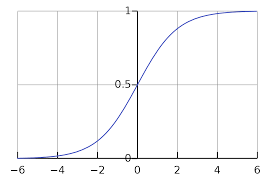

로지스틱 모델은 최대 가능도 추정(maximum likelihood estimation)을 기반으로 모델을 학습함       
이론 강의 시간동안 공부했던 내용이므로, 본 자료에서는 주어진 수식을 코드로 구현하는 연습만 진행

**Logistic regression model** (w와 b 파라미터 두가지)
\begin{equation*}
P(y_i=1|X_i) = \frac{1}{1 + e^{-(wX_i + b)}}
\end{equation*}

**Loss function**
\begin{equation*}
-\frac{1}{n} \sum_{i=1}^n (y_i * log(P(y_i=1|X_i)) + (1 - y_i) * log(1 - P(y_i=1|X_i)))
\end{equation*}

**Gradients calculation**
\begin{equation*}
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n ((P(y_i=1|X_i) - y_i) * X_i)
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n (P(y_i=1|X_i) - y_i)
\end{equation*}

In [ ]:
# Training setting
epochs = 1000
learning_rate = 1e-3

# Model weights and bias parameters
w = 0.0
b = 0.0

# Perform Gradient Descent
???
    
    
#################################################
######## Hint: use +, -, *, /, **, np.mean(), #######
########           np.exp(), np.log() ###########
    y_pred = ???   # Logistic regression
    loss = ???   # Likelihood loss
    
    dw = ???   # gradients w.r.t to w
    db = ???   # gradients w.r.t to b
    
    # Update model weights and bias
    w = ???
    b = ???
    
#################################################


print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

학습 결과를 시각화하면 다음과 같음

In [ ]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = ???

plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred < 0.5)
index2 = (y == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index], color='orange')

plt.show()

## [P.3] `sklearn` 패키지를 통해서 로지스틱 회귀 모델 학습

- [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 모듈을 이용해 경사하강법을 쉽게 구현하고자 함

In [ ]:
from ??? import ???

In [ ]:
def gd_sklearn(X, y, max_iter, C):
    X_2d = X.???
    
    reg = ???(penalty=???, 
             max_iter=???,
             C=???, # inverse of regularization strength
             tol=???,
             solver=???,
             random_state=42)
    
    reg.???
    
    w = reg.???
    b = reg.???

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return reg

In [ ]:
# training setting
epochs = 1000
C = 0.1

model = gd_sklearn(X_train, y_train, max_iter=epochs, C=C)

In [ ]:
# get train loss
X_train_2d = X_train.???
y_pred = model.???

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

In [ ]:
y_pred

In [ ]:
w = model.???
b = model.???

y_pred = ???
y_pred = y_pred.reshape(-1)

In [ ]:
# Visualize the trained linear regression model
plt.scatter(X_train, y_train)   # scatter the original data
plt.scatter(X_train, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y_train == 0) * (y_pred < 0.5)
index2 = (y_train == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X_train[index], y_train[index], color='orange')

plt.show()

In [ ]:
# get test loss
X_test_2d = X_test.???
y_pred = model.???

test_loss = np.mean((y_test - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % test_loss)

In [ ]:
w = model.???
b = model.???

y_pred = 1 / (1 + np.exp(-(w*X_test + b)))
y_pred = y_pred.reshape(-1)

In [ ]:
# Visualize the trained linear regression model
plt.scatter(X_test, y_test)   # scatter the original data
plt.scatter(X_test, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y_test == 0) * (y_pred < 0.5)
index2 = (y_test == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X_test[index], y_test[index], color='orange')

plt.show()